In [ ]:
# ========================= Step 1: Import Libraries and Load Dataset =========================

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# ========================= Step 2: Inspect Data structure and Check missing Values =========================
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


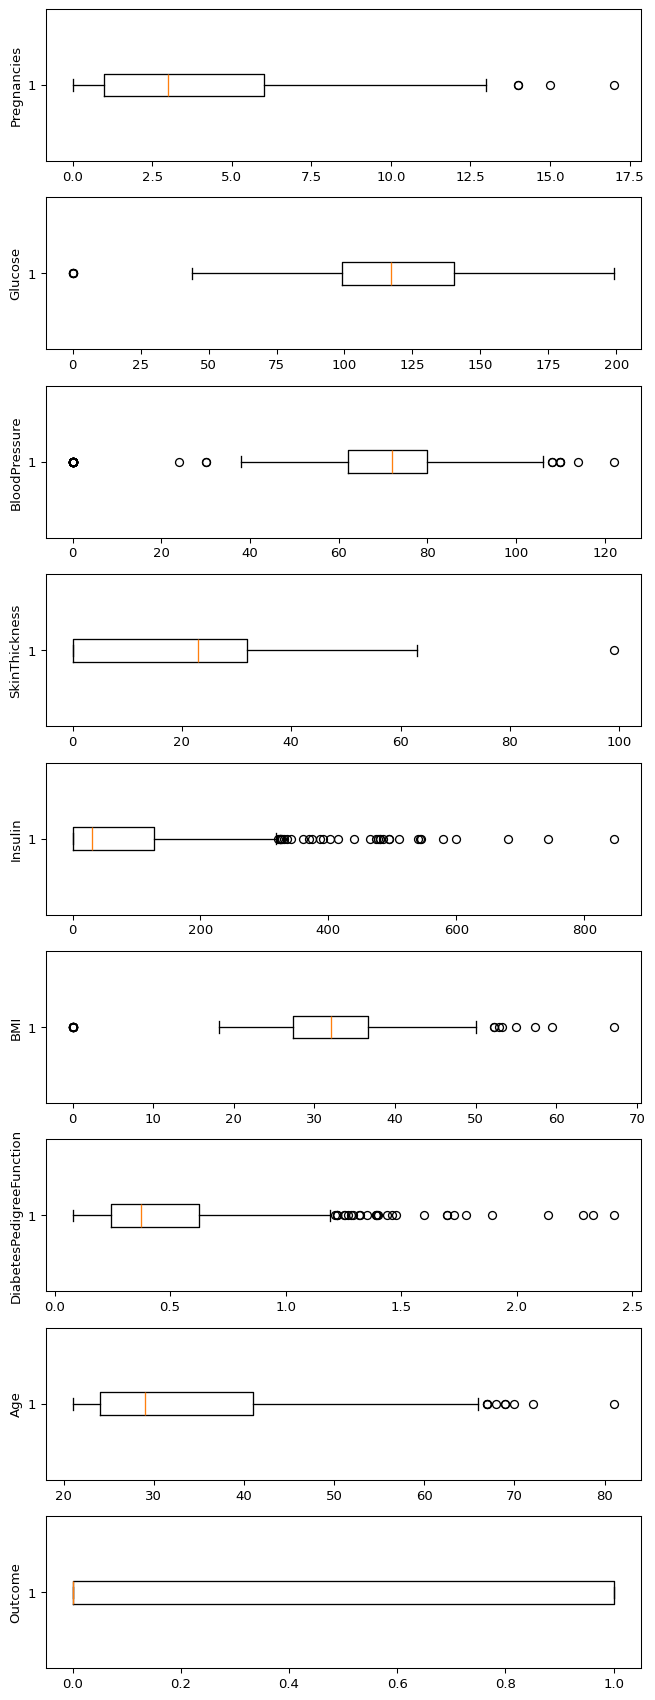

In [ ]:
# ========================= Step 3: Statistical Summary and Visualizing Outliers =========================

df.describe()

fig, axs = plt.subplots(len(df.columns), 1, figsize=(7, 18), dpi=95)

for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# ========================= Step 4: Remove Outliers Using the Interquartile Range (IQR) Method =========================

# IQR = Q3 (75th percentile) – Q1 (25th percentile).
# Values below Q1 - 1.5IQR or above Q3 + 1.5IQR are outliers.
# Calculate lower and upper bounds for each column separately.
# Filter data points to keep only those within bounds.

q1, q3 = np.percentile(df['Insulin'], [25, 75])

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

clean_df = df[(df['Insulin'] >= lower) & (df['Insulin'] <= upper)]

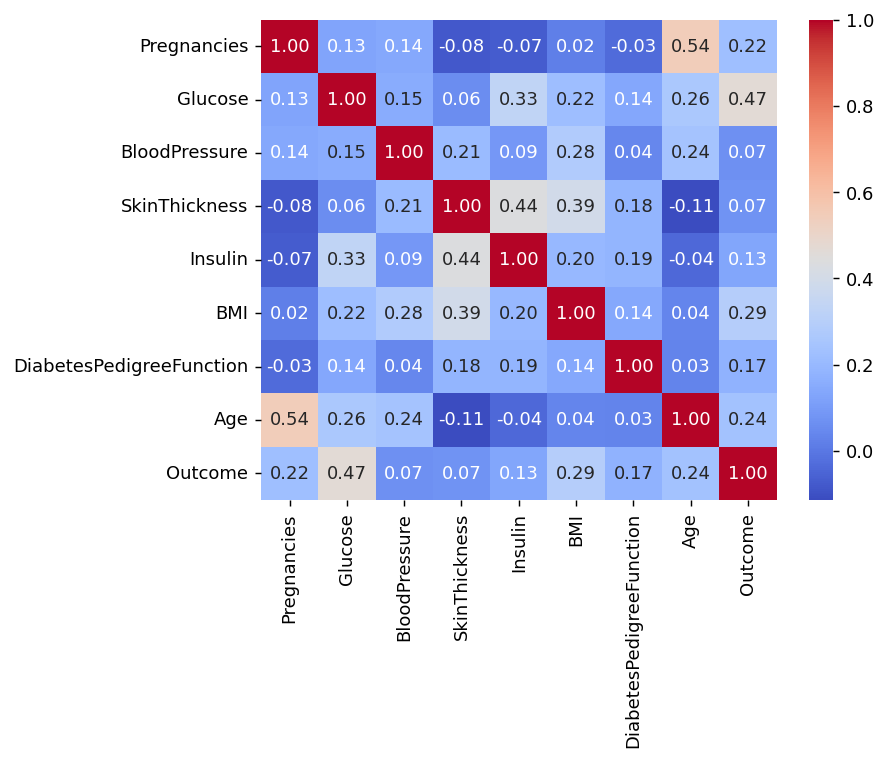

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [ ]:
# ========================= Step 5: Correlation Analysis =========================

corr = df.corr() # Computes pairwise correlation coefficients between columns.

plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm') # Heatmap via seaborn visualizes correlation matrix clearly.
plt.show()

print(corr['Outcome'].sort_values(ascending=False)) # highlights features most correlated with the target.

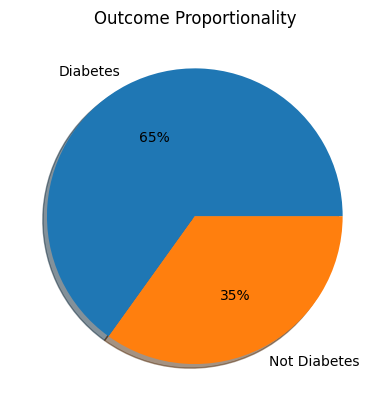

In [ ]:
# ========================= Step 6: Visualize Target Variable Distribution =========================

plt.pie(
    df['Outcome'].value_counts(),
    labels=['Diabetes', 'Not Diabetes'],
    autopct='%.f%%',
    shadow=True
) # Pie chart to display proportion of each class in the target variable 'Outcome'.
plt.title('Outcome Proportionality')
plt.show()

In [ ]:
# ========================= Step 7: Separate Features and Target Variable =========================

X = df.drop(columns=['Outcome']) # drops the target column from features.
y = df['Outcome'] # Direct column selection df['Outcome'] selects target column.

In [ ]:
# ========================= Step 8: Feature Scaling: Normalization and Stardardization =========================

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])